In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
#from password import password

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [4]:
protocol = 'postgresql'
username = 'postgres'
password = "258080"
host = 'localhost'
port = 5432
database_name = 'churn_pred'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
connection = engine.connect()

In [13]:
df = pd.read_sql("SELECT * FROM fact_churn", connection)
df.drop(["area_code_area_code_415", "area_code_area_code_510"], axis = 1, inplace = True)
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,0,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1,0,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1,0,0


In [14]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop(['churn'], axis=1)
y = df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.sample(5)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
1754,180,33,231.8,78,39.41,232.9,79,19.80,206.9,121,9.31,7.6,4,2.05,1,0,1
3657,114,0,108.3,95,18.41,168.3,104,14.31,153.1,109,6.89,9.1,2,2.46,1,0,0
2839,129,0,101.4,145,17.24,249.1,116,21.17,157.6,107,7.09,7.1,6,1.92,1,0,0
2651,117,13,207.6,65,35.29,152.7,77,12.98,232.8,95,10.48,9.7,3,2.62,1,0,1
2901,127,0,218.6,93,37.16,149.9,130,12.74,204.6,131,9.21,9.2,5,2.48,2,0,0


k: 1, Train/Test Score: 1.000/0.788
k: 2, Train/Test Score: 0.882/0.822
k: 3, Train/Test Score: 0.897/0.817
k: 4, Train/Test Score: 0.871/0.822
k: 5, Train/Test Score: 0.884/0.831
k: 6, Train/Test Score: 0.868/0.822
k: 7, Train/Test Score: 0.879/0.828
k: 8, Train/Test Score: 0.861/0.826
k: 9, Train/Test Score: 0.867/0.839
k: 10, Train/Test Score: 0.858/0.829
k: 11, Train/Test Score: 0.864/0.835
k: 12, Train/Test Score: 0.855/0.822
k: 13, Train/Test Score: 0.862/0.832
k: 14, Train/Test Score: 0.853/0.828
k: 15, Train/Test Score: 0.859/0.832
k: 16, Train/Test Score: 0.853/0.833
k: 17, Train/Test Score: 0.855/0.836
k: 18, Train/Test Score: 0.850/0.829
k: 19, Train/Test Score: 0.854/0.836


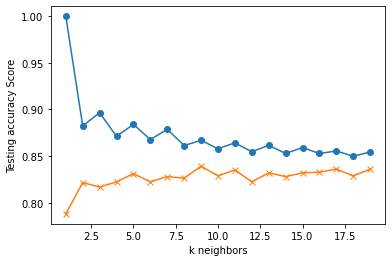

In [15]:
#Elbow Graph
train_scores = []
test_scores = []
for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 1), train_scores, marker='o')
plt.plot(range(1, 20, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
#Optimisng the model
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, scoring='accuracy',cv=10)
#Fit the model
best_model = clf.fit(X, y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 11


In [18]:
#Classification report with optimised model
train_scores = []
test_scores = []

knn = KNeighborsClassifier(n_neighbors=11,weights='uniform', algorithm='auto', leaf_size=1, p=1, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
train_scores.append(train_score)
test_scores.append(test_score)
print(f"Train/Test Score: {train_score:.3f}/{test_score:.3f}")


y_pred = knn.predict(X_test_scaled)
target_names = ['churn: no', 'churn: yes']
print(classification_report(y_test, pt, target_names=target_names))



Train/Test Score: 0.864/0.840
              precision    recall  f1-score   support

   churn: no       0.89      0.90      0.89      1013
  churn: yes       0.55      0.51      0.53       237

    accuracy                           0.83      1250
   macro avg       0.72      0.71      0.71      1250
weighted avg       0.82      0.83      0.83      1250



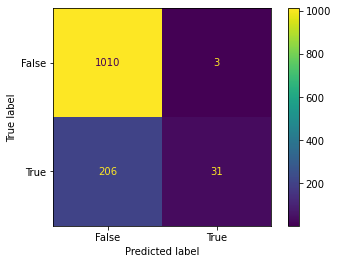

In [16]:
#Default run W/O a threshold

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

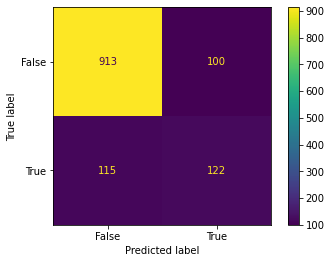

In [17]:
#With a threshold
thresh = 0.23
pt = np.where(knn.predict_proba(X_test_scaled)[:,1] > thresh, 1, 0)

confusion_matrix = metrics.confusion_matrix(y_test, pt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()